In [65]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [66]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra, IntervalRootFinding 
using CairoMakie, GLMakie

In [67]:
function get_eigen(u, p, jac_system, t = 0.0)
    Ju = jac_system(u, p, t)
    ei_u = eigen(Ju)
    return (fp = u, ei = ei_u)
end
function show_fp_eigen(data)
    println("fixed point: $(data.fp)")
    println("---------------------------------------------------")
    println("eigenvalues: $(data.ei.values)")
    println("---------------------------------------------------")
    println("eigenvectors:")
    show(stdout, "text/plain", data.ei.vectors); println()
    println("---------------------------------------------------"); println()
end
function shift_vec(eifp, col; ϵ = 1e-6, sign_ = +)
    sign_(eifp.fp, real(eifp.ei.vectors[:, 1]) * ϵ)
end;

In [68]:
t = 1000.0; tt = 600.0; tstep = 0.0001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

E = interval(-40, 40); x = interval(0, 1); y = interval(0, 1)
box = IntervalBox(E, x, y);

In [69]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305;

In [70]:
#I0 = -1.12005964820; U0 = 0.16193284544  cusp

In [75]:
#I0 = -1.31592866634479; U0 = 0.181142312729794
I0 = -1.728; U0 = 0.265
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

In [76]:
u0 = [4.09350468461962, 0.851804360585633, 0.875688899981114]  # [7.485044731286254, 0.771932479798953, 0.5235934863993938]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.0001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.265, 0.305, 0.3, -1.728]
 time:          0.0
 state:         [4.09350468461962, 0.851804360585633, 0.875688899981114]


In [77]:
fp, _, _ = fixedpoints(ds, box, jacob_TM_, method = IntervalRootFinding.Newton)
println("count of fixed points: $(length(fp))");

count of fixed points: 3


In [78]:
fp

3-dimensional StateSpaceSet{Float64} with 3 points
 1.95886  0.918066  0.956809
 8.31805  0.738656  0.439087
 1.52326  0.935104  0.966163

In [29]:
lb_size = 35; tck_size = 30; dis = 60;

In [46]:
index = 3
eifp = get_eigen(fp[index], p, jacob_TM_)
show_fp_eigen(get_eigen(fp[index], p, jacob_TM_))
shift = shift_vec(eifp, 3);
ds = CoupledODEs(TM, shift, p, diffeq = integ_set);

fixed point: [5.008843449329955, 0.8374268367796192, 0.8432504650327364]
---------------------------------------------------
eigenvalues: [-0.374310944462924, -0.30301220254087535, 0.3792884411893342]
---------------------------------------------------
eigenvectors:
3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
 -0.958457   -0.000861266   0.999217
  0.0267209   2.38933e-5   -0.0264868
 -0.283984    1.0          -0.0294074
---------------------------------------------------



In [38]:
tr, trange = trajectory(ds, t, Δt = tstep);

In [55]:
eifp.ei

Eigen{Float64, Float64, SMatrix{3, 3, Float64, 9}, SVector{3, Float64}}
values:
3-element SVector{3, Float64} with indices SOneTo(3):
 -0.374310944462924
 -0.30301220254087535
  0.3792884411893342
vectors:
3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
 -0.958457   -0.000861266   0.999217
  0.0267209   2.38933e-5   -0.0264868
 -0.283984    1.0          -0.0294074

In [60]:
ei_vec_unstable = eifp.ei.vectors[:, 3]

3-element SVector{3, Float64} with indices SOneTo(3):
  0.9992165199582078
 -0.02648681274323869
 -0.029407396914944445

In [64]:
eifp.ei.values[3] * ei_vec_unstable

3-element SVector{3, Float64} with indices SOneTo(3):
  0.3789912762655799
 -0.010046141917456796
 -0.011153885735305314

In [59]:
eifp.ei.vectors[1, 3] * fp[3][1] + eifp.ei.vectors[2, 3] * fp[3][2] + eifp.ei.vectors[3, 3] * fp[3][3]

4.95794055151907

In [56]:
fp[3] .+ eifp.ei.vectors[:, 3]

3-element SVector{3, Float64} with indices SOneTo(3):
 6.008059969288163
 0.8109400240363804
 0.813843068117792

In [43]:
fp[3]

3-element SVector{3, Float64} with indices SOneTo(3):
 5.008843449329955
 0.8374268367796192
 0.8432504650327364

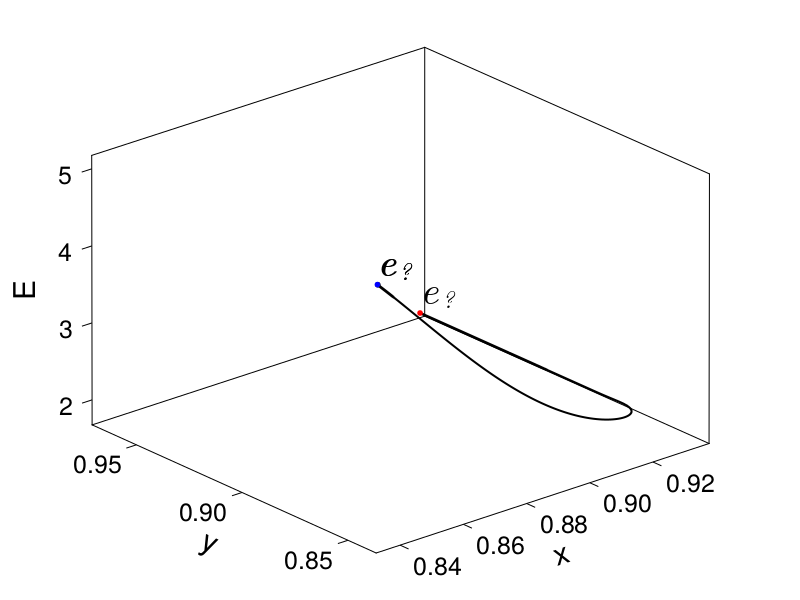

CairoMakie.Screen{IMAGE}


In [42]:
ts, tf = 1, 4000000
idx, idy, idz = 2, 3, 1
lb_size = 30; tck_size = 25;
textsize = 40
CairoMakie.activate!()
f = Figure(resolution = (800, 600), title = "?")
axis3_1 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(axis3_1, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
linewidth = 2.0, linestyle = :solid, color = :black)

scatter!(axis3_1, fp[1][2], fp[1][3], fp[1][1], markersize = 8, color = :red)
text!(axis3_1, fp[1][2], fp[1][3], fp[1][1], text = L"e_?", fontsize = textsize)

scatter!(axis3_1, fp[2][2], fp[2][3], fp[2][1], markersize = 8, color = :black)
text!(axis3_1, fp[2][2], fp[2][3], fp[2][1], text = L"e_?", fontsize = textsize)

scatter!(axis3_1, fp[3][2], fp[3][3], fp[3][1], markersize = 8, color = :blue)
text!(axis3_1, fp[3][2], fp[3][3], fp[3][1], text = L"e_?", fontsize = textsize)

display(f)

In [111]:
"""pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\bt3d.eps"
fullpath = pathtosave * filename 
save(fullpath, f)"""

"pathtosave = \"C:\\Users\\Alex\\Desktop\\TM images\"\nfilename = \"\\bt3d.eps\"\nfullpath = pathtosave * filename \nsave(fullpath, f)"

In [112]:
"""idx, idy = 2, 3
lb_size = 30; tck_size = 20;
textsize = 35
CairoMakie.activate!()
f = Figure(resolution = (800, 600), title = "?")
axis3_1 = Axis(f[1, 1], xlabel = "x", ylabel = "y",
                xlabelsize = lb_size, ylabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false)


scatter!(axis3_1, fp[1][2], fp[1][3], markersize = 8, color = :red)
text!(axis3_1, fp[1][2], fp[1][3], text = L"e_?", fontsize = textsize)

#scatter!(axis3_1, fp[2][2], fp[2][3], markersize = 8, color = :black)
#text!(axis3_1, fp[2][2], fp[2][3], text = L"e_1", fontsize = textsize)

scatter!(axis3_1, fp[3][2], fp[3][3], markersize = 8, color = :blue)
text!(axis3_1, fp[3][2], fp[3][3], text = L"e_?", fontsize = textsize)

display(f)"""

"idx, idy = 2, 3\nlb_size = 30; tck_size = 20;\ntextsize = 35\nCairoMakie.activate!()\nf = Figure(resolution = (800, 600), title = \"?\")\naxis3_1 = Axis(f[1, 1], xlabel = \"x\", ylabel = \"y\",\n                xlabelsize = lb_size, ylabelsize = lb_size,\n                xticklabelsi" ⋯ 269 bytes ⋯ "2], fp[2][3], markersize = 8, color = :black)\n#text!(axis3_1, fp[2][2], fp[2][3], text = L\"e_1\", fontsize = textsize)\n\nscatter!(axis3_1, fp[3][2], fp[3][3], markersize = 8, color = :blue)\ntext!(axis3_1, fp[3][2], fp[3][3], text = L\"e_?\", fontsize = textsize)\n\ndisplay(f)"

In [113]:
"""pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\bt2d.eps"
fullpath = pathtosave * filename 
save(fullpath, f)"""

"pathtosave = \"C:\\Users\\Alex\\Desktop\\TM images\"\nfilename = \"\\bt2d.eps\"\nfullpath = pathtosave * filename \nsave(fullpath, f)"

In [114]:
GLMakie.activate!()
idx, idy, idz = 2, 3, 1
f = Figure(resolution = (900, 600))
ax = LScene(f[1, 1], show_axis = true)
scale!(ax.scene, 50, 50, 1)

lines!(ax, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
        linewidth = 1.0, linestyle = :solid, color = :blue)

for point in fp
        scatter!(ax, point[2], point[3], point[1], markersize = 8, color = :orange)
end

display(GLMakie.Screen(), f)

GLMakie.Screen(...)